In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [148]:
car=pd.read_csv(r'C:\Users\LOQ\Downloads\MLCASESTUDY\car-selling_price-prediction\quikr_car.csv')

In [149]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [150]:
car.shape

(892, 6)

In [151]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [152]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [153]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [154]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [155]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [156]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [157]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [158]:
car=car[car['kms_driven'].str.isnumeric()]

In [159]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [160]:
car=car[~car['fuel_type'].isna()]

In [161]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [162]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [163]:
car=car.reset_index(drop=True)

## Cleaned Data

In [164]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [165]:
car.to_csv('Cleaned_Car_data.csv')

In [166]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [167]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [168]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [169]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [170]:
import seaborn as sns

C:\Users\LOQ\AppData\Local\Temp\ipykernel_33948\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


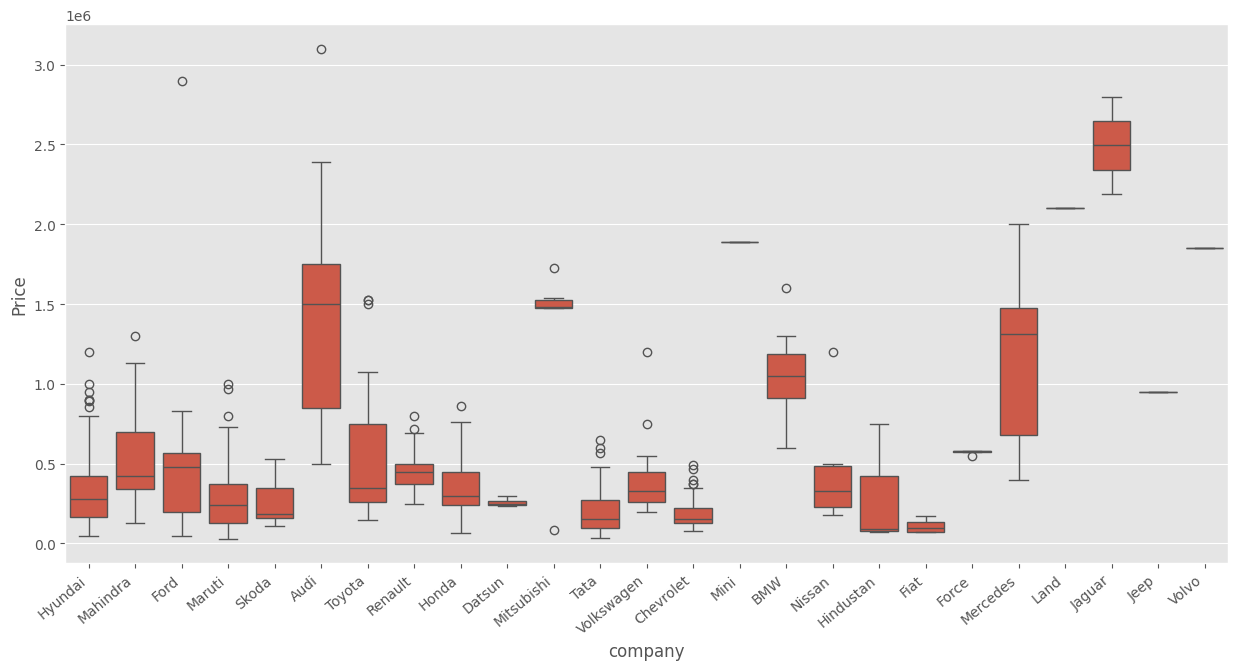

In [171]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

In [172]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

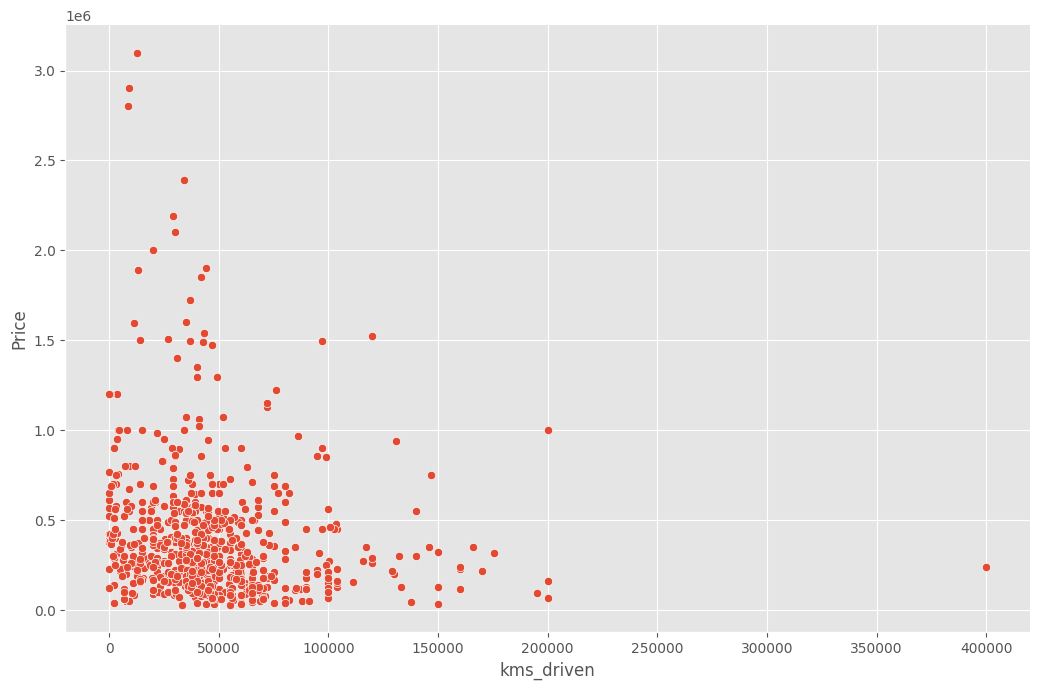

In [173]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

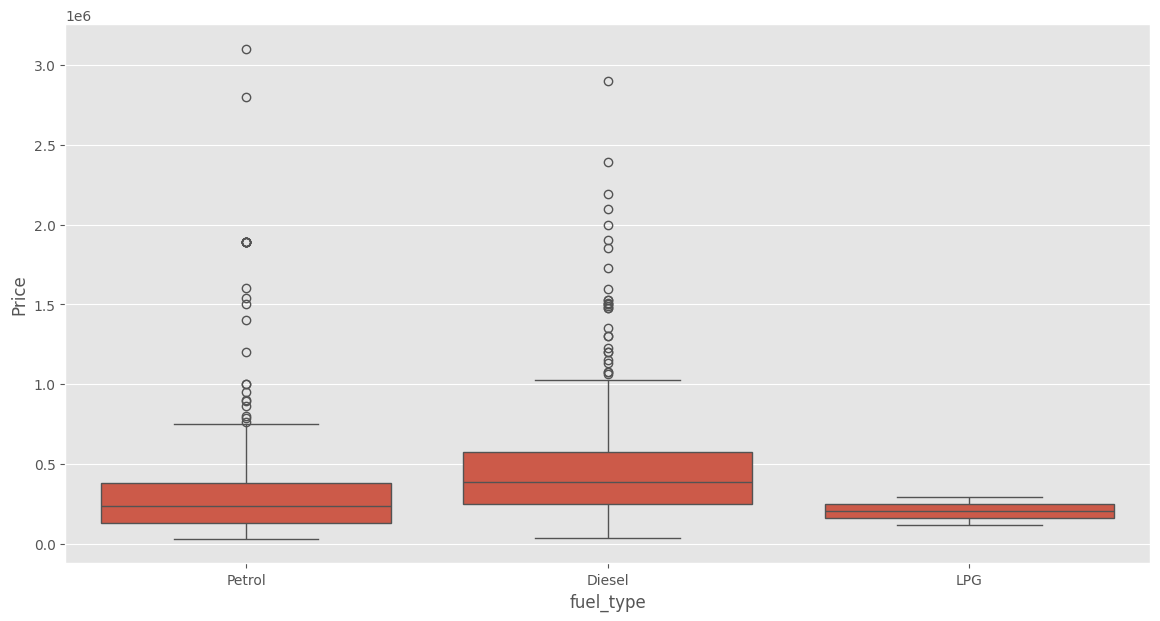

In [174]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

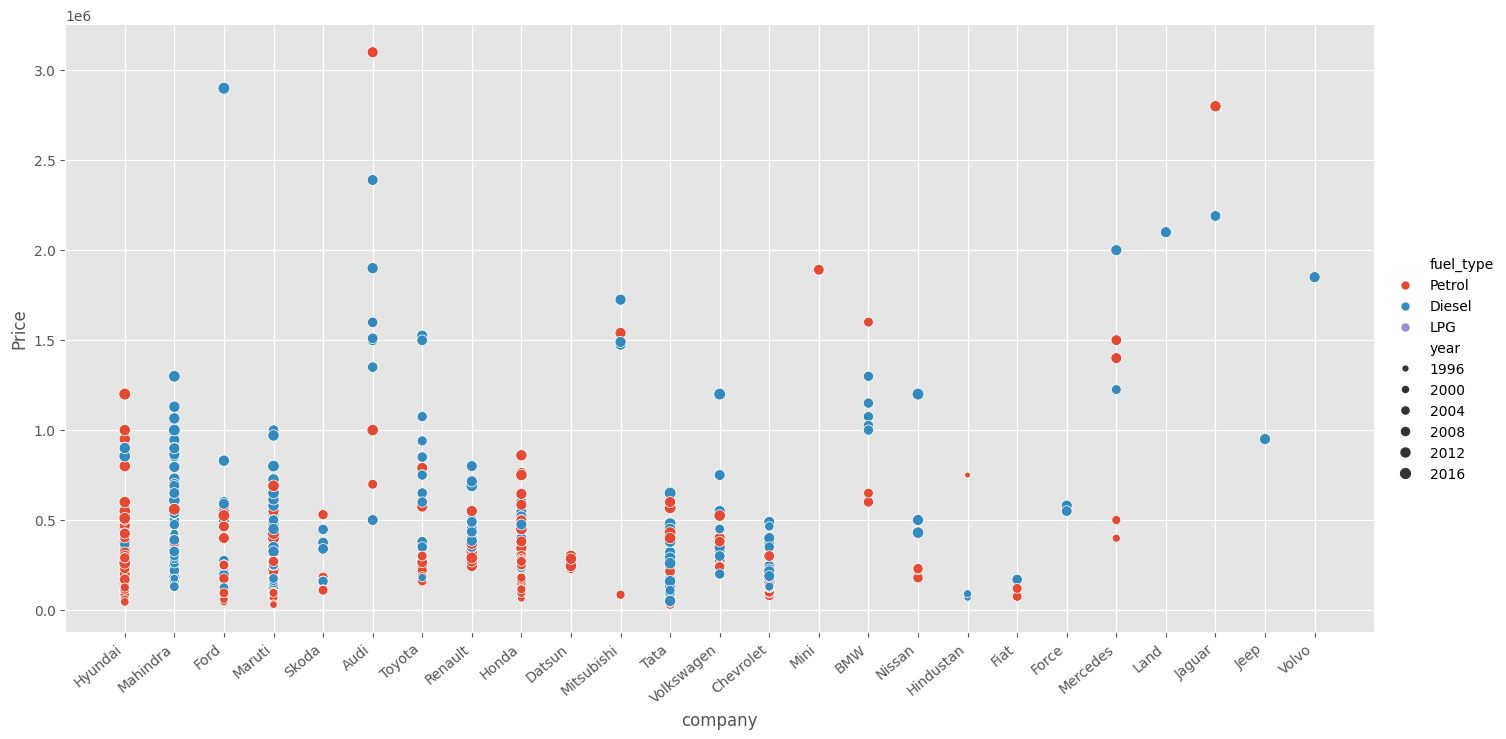

In [175]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [176]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [177]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [178]:
y.shape

(815,)

### Applying Train Test Split

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [182]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


#### Creating a column transformer to transform categorical columns

In [183]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [184]:
lr=LinearRegression()

#### Making a pipeline

In [185]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [186]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [187]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [188]:
r2_score(y_test,y_pred)

0.6634285141283015

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [189]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [190]:
np.argmax(scores)

np.int64(302)

In [191]:
scores[np.argmax(scores)]

0.8991157554877304

In [192]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430301.37134528])

#### The best model is found at a certain random state 

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [194]:
import pickle

In [195]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [196]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [197]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

In [198]:
# Import Ridge and Lasso regression modules
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Ridge and Lasso Regression with Alpha Optimization


In [199]:
# Simple Ridge Regression with basic alpha optimization
print("Ridge Regression Optimization:")
print("=" * 40)

# Test a few alpha values for Ridge
ridge_alphas = [0.001, 0.01, 0.1, 1, 10]
ridge_scores = []

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge_pipe = make_pipeline(column_trans, ridge)
    cv_scores = cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='r2')
    ridge_scores.append(cv_scores.mean())
    print(f"Ridge Alpha: {alpha}, CV R2: {cv_scores.mean():.4f}")

best_ridge_alpha = ridge_alphas[np.argmax(ridge_scores)]
print(f"\nBest Ridge Alpha: {best_ridge_alpha}")
print(f"Best Ridge CV Score: {max(ridge_scores):.4f}")


Ridge Regression Optimization:
Ridge Alpha: 0.001, CV R2: 0.1348
Ridge Alpha: 0.01, CV R2: 0.1348
Ridge Alpha: 0.1, CV R2: 0.1348
Ridge Alpha: 1, CV R2: 0.1348
Ridge Alpha: 10, CV R2: 0.1348

Best Ridge Alpha: 10
Best Ridge CV Score: 0.1348


In [200]:
# Train and evaluate the best Ridge model
best_ridge = Ridge(alpha=best_ridge_alpha)
best_ridge_pipe = make_pipeline(column_trans, best_ridge)
best_ridge_pipe.fit(X_train, y_train)

ridge_pred = best_ridge_pipe.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"\nRidge Regression Test Results:")
print(f"Alpha: {best_ridge_alpha}")
print(f"R2 Score: {ridge_r2:.4f}")
print(f"MSE: {ridge_mse:.2f}")
print(f"MAE: {ridge_mae:.2f}")



Ridge Regression Test Results:
Alpha: 10
R2 Score: 0.0595
MSE: 180563949336.14
MAE: 278381.95


## Lasso Regression Optimization


In [201]:
# Simple Lasso Regression with basic alpha optimization
print("\nLasso Regression Optimization:")
print("=" * 40)

# Test a few alpha values for Lasso
lasso_alphas = [0.001, 0.01, 0.1, 1, 10]
lasso_scores = []

for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso_pipe = make_pipeline(column_trans, lasso)
    cv_scores = cross_val_score(lasso_pipe, X_train, y_train, cv=5, scoring='r2')
    lasso_scores.append(cv_scores.mean())
    print(f"Lasso Alpha: {alpha}, CV R2: {cv_scores.mean():.4f}")

best_lasso_alpha = lasso_alphas[np.argmax(lasso_scores)]
print(f"\nBest Lasso Alpha: {best_lasso_alpha}")
print(f"Best Lasso CV Score: {max(lasso_scores):.4f}")



Lasso Regression Optimization:


c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+12, tolerance: 8.883e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.955e+11, tolerance: 6.865e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consid

Lasso Alpha: 0.001, CV R2: 0.4955


c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+11, tolerance: 8.883e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.465e+11, tolerance: 6.865e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consid

Lasso Alpha: 0.01, CV R2: 0.5036


c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.684e+11, tolerance: 8.883e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e+11, tolerance: 6.865e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consid

Lasso Alpha: 0.1, CV R2: 0.5502


c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e+10, tolerance: 8.883e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.348e+11, tolerance: 8.541e+09
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consid

Lasso Alpha: 1, CV R2: 0.5726
Lasso Alpha: 10, CV R2: 0.5720

Best Lasso Alpha: 1
Best Lasso CV Score: 0.5726


In [202]:
# Train and evaluate the best Lasso model
best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000)
best_lasso_pipe = make_pipeline(column_trans, best_lasso)
best_lasso_pipe.fit(X_train, y_train)

lasso_pred = best_lasso_pipe.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print(f"\nLasso Regression Test Results:")
print(f"Alpha: {best_lasso_alpha}")
print(f"R2 Score: {lasso_r2:.4f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"MAE: {lasso_mae:.2f}")



Lasso Regression Test Results:
Alpha: 1
R2 Score: 0.8762
MSE: 23774059288.74
MAE: 87595.23


c:\Users\LOQ\Downloads\MLCASESTUDY\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+11, tolerance: 1.026e+10
  model = cd_fast.sparse_enet_coordinate_descent(


## Model Comparison


In [203]:
# Get Linear Regression performance for comparison
linear_r2 = r2_score(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)

# Create comparison table
comparison_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [linear_r2, ridge_r2, lasso_r2],
    'MSE': [linear_mse, ridge_mse, lasso_mse],
    'MAE': [linear_mae, ridge_mae, lasso_mae],
    'Alpha': ['N/A', best_ridge_alpha, best_lasso_alpha]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print("=" * 50)
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Find best model
best_r2 = max([linear_r2, ridge_r2, lasso_r2])
best_model_idx = np.argmax([linear_r2, ridge_r2, lasso_r2])
model_names = ['Linear', 'Ridge', 'Lasso']

print(f"\nBest performing model: {model_names[best_model_idx]} (R2 Score: {best_r2:.4f})")


Model Performance Comparison:
            Model  R2 Score               MSE         MAE Alpha
Linear Regression    0.8991  19368279318.6329  98320.6463   N/A
 Ridge Regression    0.0595 180563949336.1399 278381.9459    10
 Lasso Regression    0.8762  23774059288.7419  87595.2349     1

Best performing model: Linear (R2 Score: 0.8991)


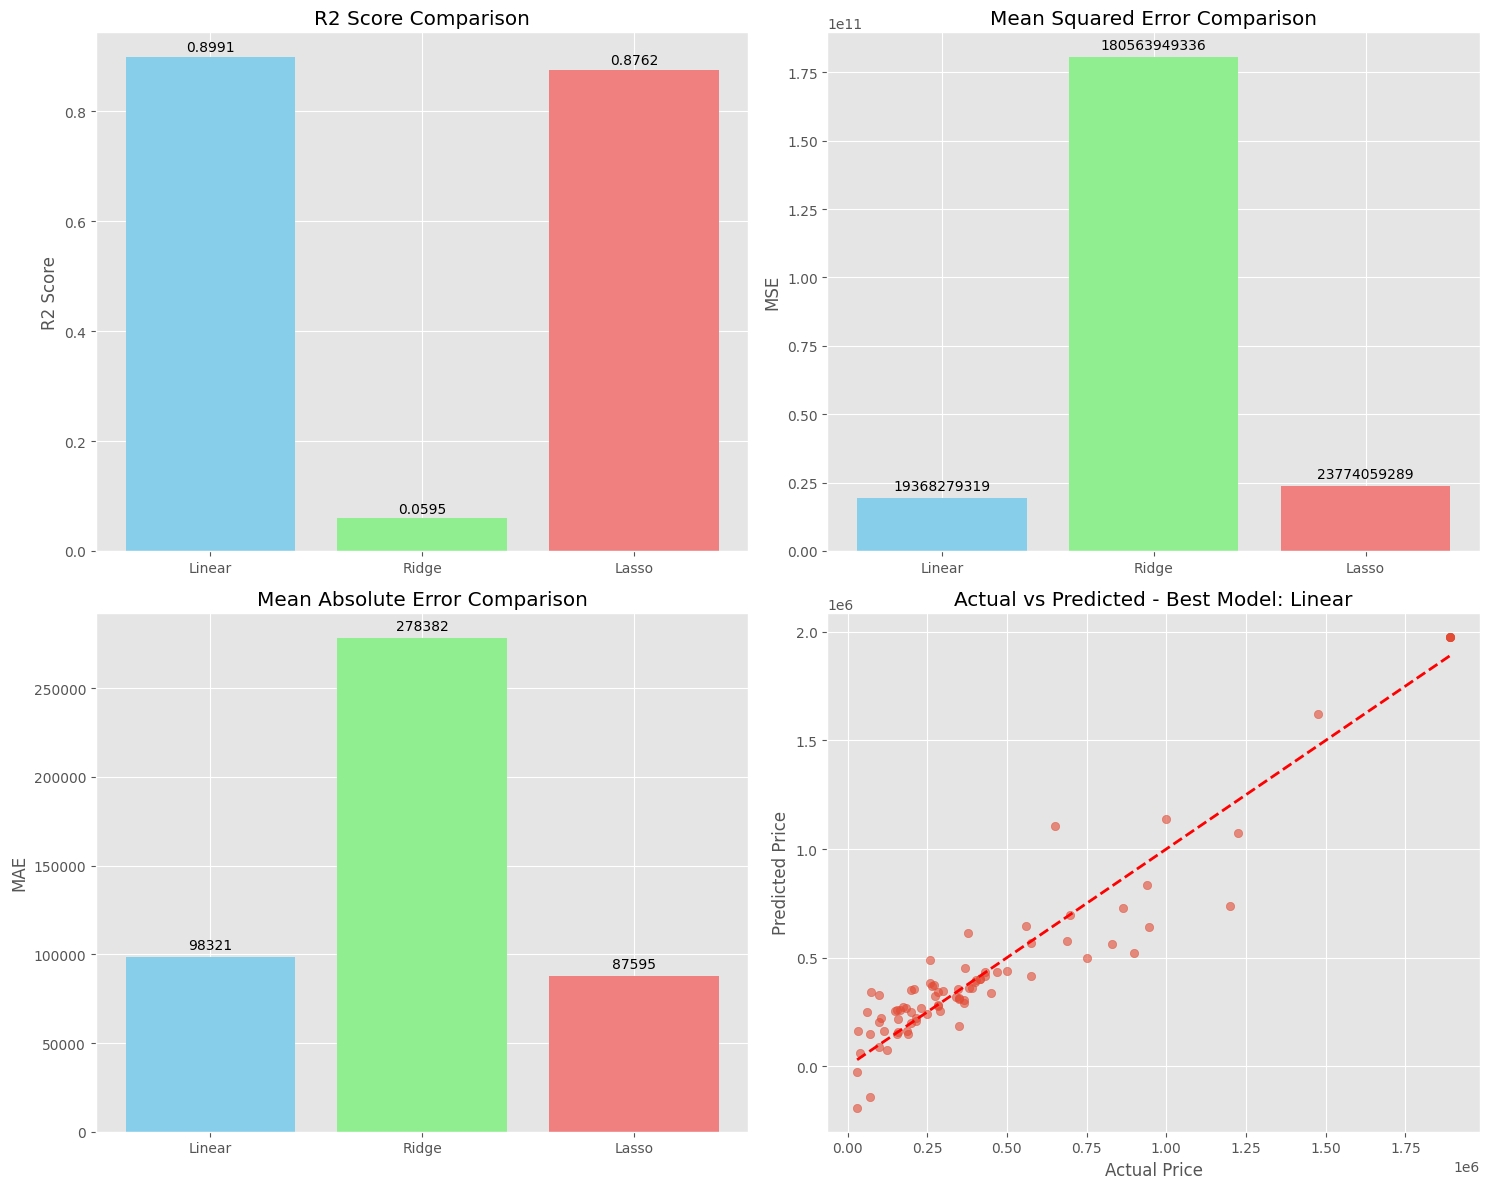


Best performing model: Linear (R2 Score: 0.8991)


In [204]:
# Visualize model comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# R2 Score comparison
models = ['Linear', 'Ridge', 'Lasso']
r2_scores = [linear_r2, ridge_r2, lasso_r2]
ax1.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('R2 Score Comparison')
ax1.set_ylabel('R2 Score')
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.005, f'{v:.4f}', ha='center', va='bottom')

# MSE comparison
mse_scores = [linear_mse, ridge_mse, lasso_mse]
ax2.bar(models, mse_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Mean Squared Error Comparison')
ax2.set_ylabel('MSE')
for i, v in enumerate(mse_scores):
    ax2.text(i, v + max(mse_scores)*0.01, f'{v:.0f}', ha='center', va='bottom')

# MAE comparison
mae_scores = [linear_mae, ridge_mae, lasso_mae]
ax3.bar(models, mae_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax3.set_title('Mean Absolute Error Comparison')
ax3.set_ylabel('MAE')
for i, v in enumerate(mae_scores):
    ax3.text(i, v + max(mae_scores)*0.01, f'{v:.0f}', ha='center', va='bottom')

# Actual vs Predicted for best model
best_model_name = models[np.argmax(r2_scores)]
if best_model_name == 'Linear':
    best_predictions = y_pred
elif best_model_name == 'Ridge':
    best_predictions = ridge_pred
else:
    best_predictions = lasso_pred

ax4.scatter(y_test, best_predictions, alpha=0.6)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax4.set_xlabel('Actual Price')
ax4.set_ylabel('Predicted Price')
ax4.set_title(f'Actual vs Predicted - Best Model: {best_model_name}')

plt.tight_layout()
plt.show()

print(f"\nBest performing model: {best_model_name} (R2 Score: {max(r2_scores):.4f})")


In [205]:
# Save the best models
import pickle

# Save models
pickle.dump(best_ridge_pipe, open('RidgeRegressionModel.pkl', 'wb'))
pickle.dump(best_lasso_pipe, open('LassoRegressionModel.pkl', 'wb'))
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

print("Models saved successfully!")
print(f"\nFinal Summary:")
print(f"Linear Regression R2: {linear_r2:.4f}")
print(f"Ridge Regression R2: {ridge_r2:.4f} (Alpha: {best_ridge_alpha})")
print(f"Lasso Regression R2: {lasso_r2:.4f} (Alpha: {best_lasso_alpha})")
print(f"\nBest Model: {model_names[best_model_idx]} with R2 = {best_r2:.4f}")


Models saved successfully!

Final Summary:
Linear Regression R2: 0.8991
Ridge Regression R2: 0.0595 (Alpha: 10)
Lasso Regression R2: 0.8762 (Alpha: 1)

Best Model: Linear with R2 = 0.8991


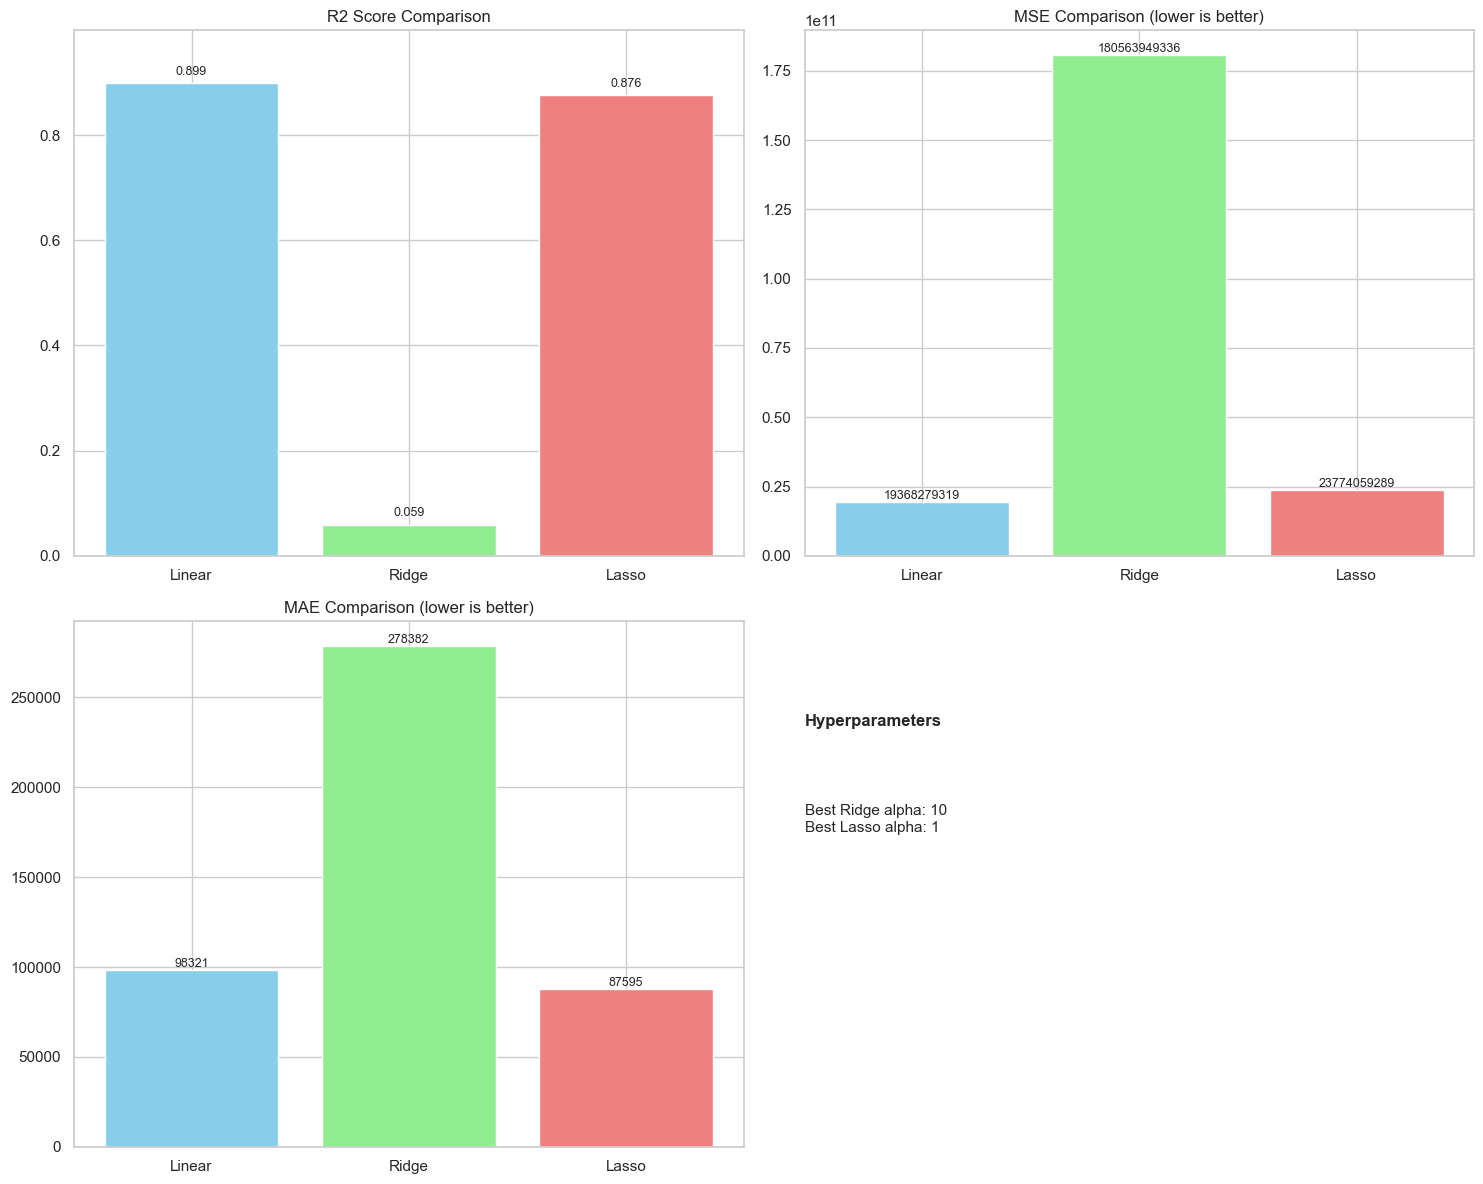

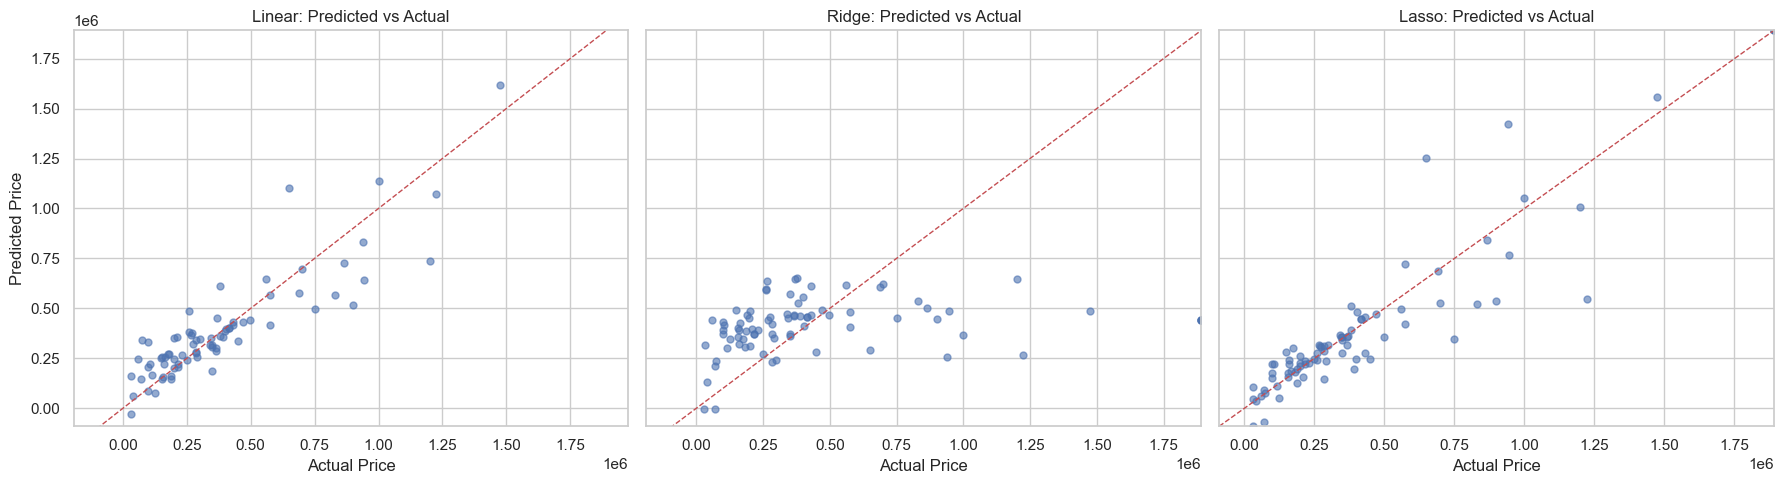

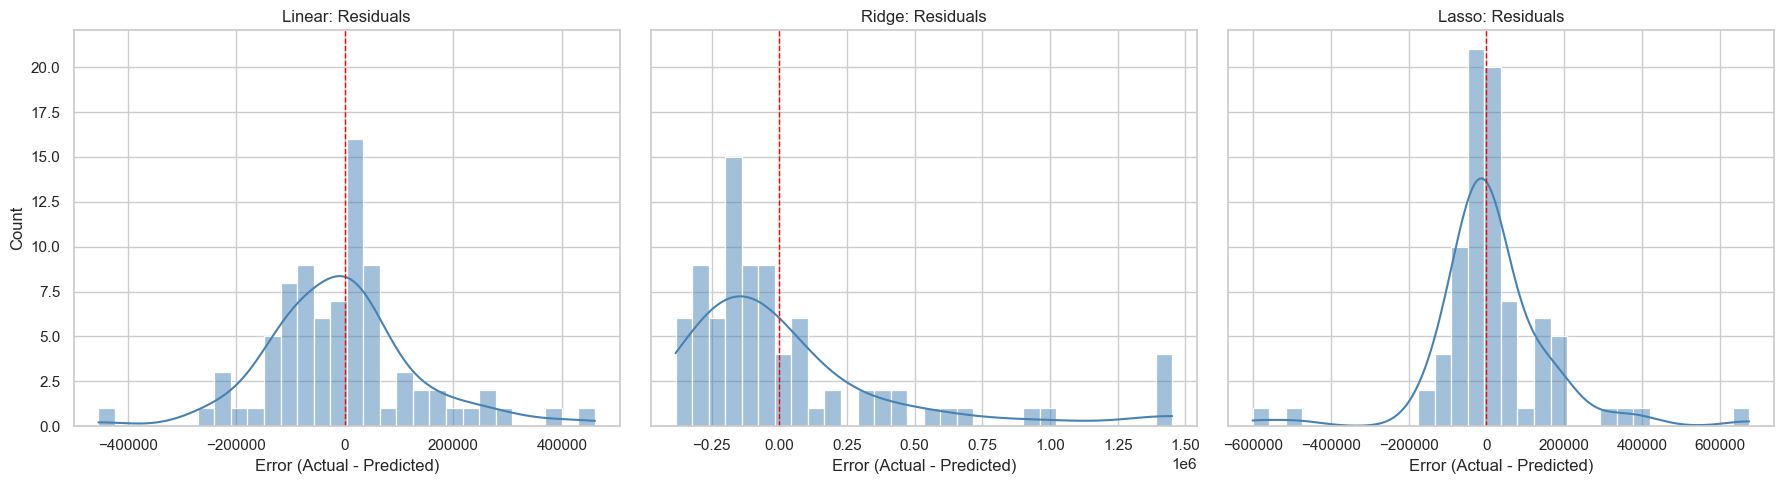

In [206]:
# Visual comparisons for Linear, Ridge, and Lasso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
sns.set(style="whitegrid")

# 1) Metric comparison bars
models = ['Linear', 'Ridge', 'Lasso']
r2_scores = [linear_r2, ridge_r2, lasso_r2]
mses = [linear_mse, ridge_mse, lasso_mse]
maes = [linear_mae, ridge_mae, lasso_mae]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R2
axes[0,0].bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0,0].set_title('R2 Score Comparison')
axes[0,0].set_ylim(0, max(0.0, max(r2_scores)) + 0.1)
for i, v in enumerate(r2_scores):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# MSE (lower is better)
axes[0,1].bar(models, mses, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0,1].set_title('MSE Comparison (lower is better)')
for i, v in enumerate(mses):
    axes[0,1].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

# MAE (lower is better)
axes[1,0].bar(models, maes, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[1,0].set_title('MAE Comparison (lower is better)')
for i, v in enumerate(maes):
    axes[1,0].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

# Best alpha info
alpha_text = f"Best Ridge alpha: {best_ridge_alpha}\nBest Lasso alpha: {best_lasso_alpha}"
axes[1,1].axis('off')
axes[1,1].text(0.0, 0.8, 'Hyperparameters', fontsize=12, fontweight='bold')
axes[1,1].text(0.0, 0.6, alpha_text, fontsize=11)

plt.tight_layout()
plt.show()

# 2) Predicted vs Actual scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
pairs = [
    ('Linear', np.array(y_pred)),
    ('Ridge', np.array(ridge_pred)),
    ('Lasso', np.array(lasso_pred)),
]
y_true = np.array(y_test)

for ax, (name, pred) in zip(axes, pairs):
    ax.scatter(y_true, pred, alpha=0.6, s=25)
    lims = [min(y_true.min(), pred.min()), max(y_true.max(), pred.max())]
    ax.plot(lims, lims, 'r--', linewidth=1)
    ax.set_title(f'{name}: Predicted vs Actual')
    ax.set_xlabel('Actual Price')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
axes[0].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

# 3) Residual distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
residuals = [
    ('Linear', y_true - np.array(y_pred)),
    ('Ridge', y_true - np.array(ridge_pred)),
    ('Lasso', y_true - np.array(lasso_pred)),
]

for ax, (name, res) in zip(axes, residuals):
    sns.histplot(res, bins=30, kde=True, ax=ax, color='steelblue')
    ax.axvline(0, color='red', linestyle='--', linewidth=1)
    ax.set_title(f'{name}: Residuals')
    ax.set_xlabel('Error (Actual - Predicted)')
axes[0].set_ylabel('Count')

plt.tight_layout()
plt.show()